# Practical work 0 - Self-Organising Maps
## Enviroment preparation
#### Libraries

In [ ]:
# from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
from copy import deepcopy
from IPython.display import clear_output

%matplotlib inline

#### Create de training dataset

In [ ]:
# Create a matrix of 100 random colors using the RGB code (values 0 to 255)

min_value = 0
max_value = 255
color_values = 100
num_colors = 3

#color_values = 100
#num_colors = 3

initial_data = np.random.randint(min_value, max_value, (color_values, num_colors))

In [ ]:
#print(initial_data)

## SOM Setup

In [ ]:
# Initialize the main variables: (1) the side of the Kohonen map, (2) number of iterations (epochs) and the (3) learning rate.
# Initialize the variable normalize_data depending on whether you need to normalize the data or not.

map_side = 30
#size that we want for the kohonnen map, relates to te explanation of the result, many is difficult to represent all the patterns = worst model (10/20/5 correct)
epochs = 55000
#number of iterations for the training
initial_lr = 0.001
#initial learning rate
normalize_data = True
#normalize for floating numbers; RBG (integers = minimize number or floating point numbers (0-1))

In [ ]:
initial_data.shape

(100, 3)

#### From this point there are only calculations. No more values ​​are inserted "by hand".

In [ ]:
# Set the number of inputs for the map and the number of data points to be used for training.
# Use a function to automatically obtain the values from the Dataset.
#according to shape
num_data = initial_data.shape[0]
num_inputs = initial_data.shape[1]

# Calculate the initial neighborhood. It should be half the size of the Kohonen map's size.
#sigma = neighbourhood size
initial_sigma = max(map_side, map_side) / 2

# Normalize the data if necessary by dividing each data point by the maximum value in the matrix.
#better maximum(normalization) than euclidean form = because of the nature of the data, RGB we know the range
#for the dimension add else in case rectangular
if normalize_data:
    normalized_data = initial_data / initial_data.max()
else:
   normalized_data = initial_data

# Create a weight matrix with random values between 0 and 1. Use the random or random_uniform functions from the NumPy library.
# More info (random.random):
# More info (random.random_uniform):

initial_weight_matrix = np.random.rand(map_side,map_side,num_inputs)

print(initial_weight_matrix.shape)
#all values between 0-1
print(initial_weight_matrix)

if normalize_data:
  normalized_weight_matrix = initial_weight_matrix
else:
  normalized_weight_matrix = initial_weight_matrix

#define structure and location of the coordinates, output index definition for kohonnen map
output_index = np.indices((map_side,map_side))


(30, 30, 3)
[[[0.22105306 0.51939675 0.46972032]
  [0.66235545 0.83178165 0.21543832]
  [0.63229465 0.59996989 0.14353523]
  ...
  [0.23974332 0.74378052 0.44005819]
  [0.40404111 0.99314836 0.28585008]
  [0.22158903 0.03879637 0.51437764]]

 [[0.32436321 0.86498748 0.90916671]
  [0.97966106 0.32447132 0.22287856]
  [0.39109932 0.29257993 0.19752444]
  ...
  [0.8232204  0.91616019 0.59781122]
  [0.65667534 0.74230094 0.65201324]
  [0.38851348 0.91305524 0.2736289 ]]

 [[0.89898646 0.74549472 0.32810376]
  [0.56773772 0.54587184 0.26488656]
  [0.39168253 0.87220383 0.56523997]
  ...
  [0.49662971 0.44062386 0.24667181]
  [0.46819503 0.49519777 0.94559351]
  [0.08392754 0.18622511 0.73335308]]

 ...

 [[0.35132667 0.11611078 0.90472724]
  [0.18134397 0.8773544  0.69696481]
  [0.71969867 0.93393677 0.7889451 ]
  ...
  [0.0508448  0.45455714 0.37246886]
  [0.98925568 0.05533695 0.9568267 ]
  [0.1095632  0.51474689 0.90326496]]

 [[0.63686025 0.98223495 0.05833211]
  [0.16020389 0.87302188 

In [ ]:
#print(output_index)

In [ ]:
#print(normalized_data)

In [ ]:
#print(normalized_weight_matrix)

#### Funciones para entrenar/clasificar

In [ ]:
# Function to calculate the BMU.

def calculate_bmu(
    input_pattern,
    weight_matrix):
    """
    Finds the BMU (Best Matching Unit) for an input pattern on a Kohonen map.

    Parameters:
    input_pattern (numpy array): Input pattern to be compared with the weight vectors.
    weight_matrix (numpy array): Matrix of weight vectors representing the Kohonen map.

    Returns:
    tuple: A tuple containing the BMU (Best Matching Unit) weight vector and its coordinates.
    """

    distance_matrix = np.sqrt(((weight_matrix - input_pattern)**2).sum(axis = 2))

    idx = np.argmin(distance_matrix)

    bmu_flat_idx = np.argmin(distance_matrix)

    bmu_idx = np.unravel_index(bmu_flat_idx,(map_side,map_side))

    bmu = weight_matrix[bmu_idx]

    idx = np.argmin(np.sqrt(((weight_matrix - input_pattern)**2).sum(axis = 2)))

    return (bmu,np.unravel_index(idx,(map_side,map_side)))

    # # Calcula la distancia euclidiana de cada vector de peso en la matriz al patrón de entrada.
    # distance_matrix = np.sqrt(((weight_matrix - input_pattern) ** 2).sum(axis=2))

    # # Encuentra el índice del vector de peso con la menor distancia (BMU) en el formato aplanado.
    # bmu_flat_idx = np.argmin(distance_matrix)

    # # Convierte el índice aplanado a coordenadas 2D.
    # bmu_idx = np.unravel_index(bmu_flat_idx, (map_side, map_side))

    # # Obtiene el vector de peso de la BMU utilizando las coordenadas 2D.
    # bmu = weight_matrix[bmu_idx]

    # return (bmu, bmu_idx)

In [ ]:
# Function to calculate the descent of the learning coefficient (alpha)

def learning_rate_variation(
    initial_lr,
    i,
    epochs):
    """
    Calculate the learning rate (alpha) for the i-th iteration.

    Parameters:
    initial_lr (float): Initial learning rate.
    i (int): Current iteration.
    epochs (int): Total number of iterations.

    Returns:
    float: Learning rate for the i-th iteration.
    """

    # Calcular la tasa de aprendizaje actual basada en una disminución lineal.
    #initial_lr * initial_lr * (1 - i / epochs)
    return initial_lr * np.exp(1 - i / epochs)

In [ ]:
# Función para calcular el descenso del vecindario (v)

def neighborhood_variation(
    neighborhood,
    i,
    epochs):
    """
    Calculate the neighborhood (v) for the i-th iteration.

    Parameters:
    initial_neighborhood (float): Initial neighborhood value.
    i (int): Current iteration.
    epochs (int): Total number of iterations.

    Returns:
    float: Neighborhood value for the i-th iteration.
    """
    return (neighborhood * np.exp(-1 / epochs)) + 1

In [ ]:
# Topological Neighbourhood Function

def decay(
    distance_to_bmu,
    current_neighborhood):
    """
    Calculate the distribution of the learning rate based on the distance in the map between a neuron and the BMU.

    Parameters:
    distance_to_bmu (float): Distance between a neuron and the BMU.
    current_neighborhood (float): Current neighborhood value.

    Returns:
    float: Damping factor for the iteration.
    """
    return np.exp(-distance_to_bmu**2 / (2 * current_neighborhood**2))


#### Funciones para dibujar la salida de la red

In [ ]:
# Function to print a matrix of values as RGB colors

def paint_map(
    value_matrix,
    epochs):
    """
    Function to visualize a matrix of values as RGB colors.

    Parameters:
    value_matrix (numpy array): Matrix of RGB values to be visualized.
    epochs (int): Number of epochs (iterations) completed.

    Returns:
    None
    """

    fig = plt.figure()

    # Set axes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, value_matrix.shape[0]+1))
    ax.set_ylim((0, value_matrix.shape[1]+1))
    ax.set_title('Self-Organizing Map after %d iterations' % epochs)

    for x in range(1, map_side + 1):
      for y in range(1, map_side + 1):
        ax.add_patch(
            patches.Rectangle((x-0.5, y-0.5), 1, 1,
            facecolor = value_matrix[x-1,y-1,:],
            edgecolor = 'none'))

    plt.show()

In [ ]:
training_data = normalized_data
training_data.shape[0]

100

## SOM Training step

In [ ]:
def train(training_data, weight_matrix, lr, neighborhood, epochs, map_side):
    for epoch in range(1, epochs + 1):
        # Selecciona un patrón aleatorio del conjunto de datos
        input_sample = training_data[np.random.randint(0, len(training_data))]

        # Calcula/Actualiza los parámetros para esta iteración
        learning_rate = learning_rate_variation(lr, epoch, epochs)
        current_neighborhood = neighborhood_variation(neighborhood, epoch, epochs)

        # Encuentra la Unidad de Mejor Coincidencia (BMU) para el patrón de entrada
        bmu, bmu_idx = calculate_bmu(input_sample, weight_matrix)

        # Calcula la distancia de cada neurona a la BMU y ajusta los pesos
        for x in range(map_side):
            for y in range(map_side):
                distance_to_bmu = np.sqrt((x - bmu_idx[0])**2 + (y - bmu_idx[1])**2)
                if distance_to_bmu <= current_neighborhood:
                    influence = decay(distance_to_bmu, current_neighborhood)
                    weight_matrix[x, y, :] += learning_rate * influence * (input_sample - weight_matrix[x, y, :])

        # Visualización de la matriz de pesos cada 100 iteraciones
        if epoch % 5000 == 0:
            clear_output(wait=True)  # Limpia la salida anterior
            print(f"Iteración: {epoch}/{epochs}")
            # Normaliza la matriz de pesos para la visualización
            weight_matrix_normalized = (weight_matrix - weight_matrix.min()) / (weight_matrix.max() - weight_matrix.min())
            paint_map(weight_matrix_normalized, epoch)

    return weight_matrix


## SOM Classification step

In [ ]:
# Classify the training patterns with the newly trained weight matrix.
def classify_patterns(training_data, weight_matrix):
    """
    Classify the training patterns using the trained weight matrix.

    Parameters:
    training_data (numpy array): The dataset used for training.
    weight_matrix (numpy array): The trained weight matrix of the SOM.

    Returns:
    numpy array: An array containing the BMU indices for each input pattern.
    """
    bmu_indices = []

    for input_sample in training_data:
        # Encuentra la BMU para el patrón de entrada actual.
        _, bmu_idx = calculate_bmu(input_sample, weight_matrix)
        bmu_indices.append(bmu_idx)

    return np.array(bmu_indices)

    # Después del entrenamiento, clasifica los patrones de entrenamiento.
    bmu_indices = classify_patterns(training_data, weight_matrix)

    # Opcional: Imprimir o procesar los índices de las BMU para cada patrón de entrada.

    for i, bmu_idx in enumerate(bmu_indices):
        print(f"Patrón {i} clasificado en la neurona con índice {bmu_idx}.")



## SOM Test step

In [ ]:
# Classify new patterns
def classify_new_patterns(new_data, weight_matrix):
    """
    Classify new patterns using the trained weight matrix of the SOM.

    Parameters:
    new_data (numpy array): The new dataset to classify.
    weight_matrix (numpy array): The trained weight matrix of the SOM.

    Returns:
    numpy array: An array containing the BMU indices for each new pattern.
    """
    bmu_indices = []

    for input_sample in new_data:
        # Find the Best Matching Unit (BMU) for the input pattern.
        _, bmu_idx = calculate_bmu(input_sample, weight_matrix)
        bmu_indices.append(bmu_idx)

    return np.array(bmu_indices)


Iteración: 10000/55000


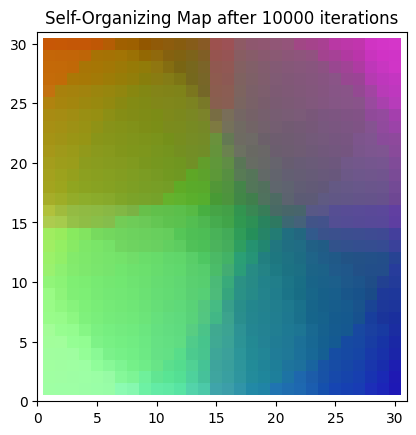

In [ ]:
weight_matrix = np.random.rand(map_side, map_side, 3)  # Inicialización de la matriz de pesos
trained_weight_matrix = train(normalized_data, normalized_weight_matrix, initial_lr, initial_sigma, epochs, map_side)


In [ ]:
# Initialize classification map, activation map, and distance map
classification_map = np.zeros((map_side, map_side, num_colors), dtype=int)
activation_map = np.zeros((map_side, map_side), dtype=int)
distance_map = np.zeros((map_side, map_side), dtype=float)

# Test the trained SOM with the test_set
test_set = [[255, 255, 255], [255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [255, 0, 255], [0, 255, 255], [5, 5, 5]]
test_set_normalized = np.array(test_set) / initial_data.max()

for i, test_pattern in enumerate(test_set_normalized):
    # Find the Best Matching Unit (BMU) for the test pattern
    bmu, bmu_idx = calculate_bmu(test_pattern, normalized_weight_matrix)

    # Print the coordinates (x, y) of the BMU for each test pattern in the test_set
    print(f"BMU for test pattern {i+1}: ({bmu_idx[0]}, {bmu_idx[1]})")

    # Update the classification map for the test_set
    classification_map[bmu_idx[0], bmu_idx[1], :] = test_pattern

    # Update the activation map for the test_set
    activation_map[bmu_idx[0], bmu_idx[1]] += 1

    # Check if activation_map is non-zero before updating distance_map
    if activation_map[bmu_idx[0], bmu_idx[1]] > 0:
        # Update the distance map for the test_set
        distance_map[bmu_idx[0], bmu_idx[1]] += np.sqrt((test_pattern - normalized_weight_matrix[bmu_idx])**2).sum()

# Calculate the number of classes for the test_set
num_classes_test_set = np.count_nonzero(activation_map)

# Calculate the average distance (Quantization Error) for the test_set
# Handle division by zero by setting nan values to 0
quantization_error_test_set = np.divide(distance_map, activation_map, out=np.zeros_like(distance_map), where=activation_map!=0)

# Calculate the Topological Error for the test_set
topological_error_test_set = np.count_nonzero(activation_map > 1)

# Print the results for the test_set
print("\nResults for Test Set:")
print(f"Number of Classes: {num_classes_test_set}")
paint_map(classification_map, 0)
paint_map(normalized_weight_matrix,epochs)
print(activation_map.shape)
print(f"Quantization Error: {np.nanmean(quantization_error_test_set)}")  # Use np.nanmean to handle nan values
print(f"Topological Error: {topological_error_test_set}")